# Introduction

Human language is one of the greatest invention of human kind. It revolutioned our society many thousands year ago and still doing so. Recently computer and technology is revolutionizing our society even more so and faster than before. Natural language processing is a study of combining these two revolutionaey technologies. 

There have been great progress in this direction in recent decade. Today the recurrent neural network and its variations are the state of art technique for the natural language processing. In this project, however we consider tree based ensemble method for this task. This work is purely experimental. 

In this project we analyze the sentiment of the twitter data. Dataset used to make a model is found here: 

https://www.kaggle.com/kazanova/sentiment140


It contains 1.6 millions of tweets. Half of them are labeled as positive tweets and half of them are negative. 

Natural language processing is challenging among all the machine learning task. Language possesses more irregualrities than the other form of data, like tabular data and image data. 


Tweet is more more challenging because of the following reason. 

- They are usually short. Longer the text the more evident the emotion would be. But many tweets are very short. Sometimes just one word or sometimes directed to other url. 
- People follow less about grammer and people express them in less formal way. Distorted patter makes the task of computer even more challenging as it is entirely based on the pattern recognization. 
- In electronic media peopel use various emoji to express them. This is the new invention in the human language in the process of adapting the language to the computer. This is the new evolution of human language but we have to deal with it. 
- Many of the tweet contains url. Accessing the content there can greatly improve the performance of the model. But thet certainly is the added complexity to the problem. 
- Many tweet mention other users in their tweet. Many of the mention makes sense in the context of the relation between users. 


In [1]:
import re
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from emoji.unicode_codes import UNICODE_EMOJI

# Imported locally
from emoticons import EMOTICONS

In [2]:
col_names = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']
col_taken = ['sentiment', 'text']

df = pd.read_csv('Twit_sentiment.csv', encoding='ISO-8859-1', names=col_names, usecols=col_taken)

df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [3]:
df.sample(5)

,sentiment,text
310215,0,i'm so jealuos....my sister got the blackberry...
1480443,4,@Mathiayus Welcome
255604,0,@Nohition mine's next saturday.
260056,0,@YoungQ Thanks for the Cleveland shout out We...
1415433,4,i just found 10 bucks


In [4]:
print('Few Samples: \n ')
for i in range(1, 6):
    print('Good: \t', df['text'].iloc[-i], '\n', 
         'Bad: \t', df['text'].iloc[i], '\n')

Few Samples: 
 
Good: 	 happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H  
 Bad: 	 is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

Good: 	 Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur  
 Bad: 	 @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

Good: 	 Are you ready for your MoJo Makeover? Ask me for details  
 Bad: 	 my whole body feels itchy and like its on fire  

Good: 	 TheWDB.com - Very cool to hear old Walt interviews!  â« http://blip.fm/~8bmta 
 Bad: 	 @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  

Good: 	 Just woke up. Having no school is the best feeling ever  
 Bad: 	 @Kwesidei not the whole crew  



# Data cleaning 

#### Stemming 

What is it?



In [5]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

print('Total number of stop words: \t', len(stop_words))

Total number of stop words: 	 179


In [6]:
def preprocess(text):
    
    # Replacing emojos and emoticons 
    # This step takes longer 
    text = emoji.demojize(text, delimiters=('', ''))
    
    for emo in EMOTICONS.keys():
        text = text.replace(emo, EMOTICONS[emo])

    # Replacing url
    text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)

    # Replacing username 
    text = re.sub('@[^\s]+', 'USER', text)

    # Replacing ayyyyyyy -> ayy
    text = re.sub(r'(.)\1\1+', r'\1\1', text)

    # Replacing everything else alphanumeric 
    text = re.sub('[^a-zA-Z\d\s]', '', text)
    text = re.sub('\d+', 'NUM', text)

    # Lower case
    text = text.lower()
    
    # Stop words and stemming 
    text = ' '.join([stemmer.stem(word) \
                    for word in str(text).split() \
                    if word not in stop_words])
    
    return text

In [7]:
df['text'] = df['text'].apply(preprocess)

In [8]:
df.sample(5)

,sentiment,text
295191,0,user aww beyi fair havn cypha wit spanish mama...
206764,0,url sun
929769,4,user u continu ur workout stick program help u...
532170,0,waffl omlett bacon juicetyp breakfast mom come...
606786,0,soo look forward see dentist today


In [9]:
print('Few Samples (cleaned): \n ')
for i in range(1, 6):
    print('Good: \t', df['text'].iloc[-i], '\n', 
         'Bad: \t', df['text'].iloc[i], '\n')

Few Samples (cleaned): 
 
Good: 	 happi charitytuesday user user user 
 Bad: 	 upset cant updat facebook text might cri result school today also blah 

Good: 	 happi numth birthday boo time tupac amaru shakur 
 Bad: 	 user dive mani time ball manag save num rest go bound 

Good: 	 readi mojo makeov ask detail 
 Bad: 	 whole bodi feel itchi like fire 

Good: 	 thewdbcom cool hear old walt interview url 
 Bad: 	 user behav im mad cant see 

Good: 	 woke school best feel ever 
 Bad: 	 user whole crew 



# How many words are there in average in each tweet?

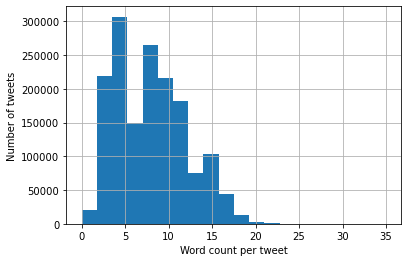

In [10]:
word_count = df['text'].str.split().str.len()
word_count.hist(bins=20)
plt.xlabel('Word count per tweet')
plt.ylabel('Number of tweets')
plt.show()

In [11]:
word_count.describe()

count    1.600000e+06
mean     7.818293e+00
std      4.032662e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      3.500000e+01
Name: text, dtype: float64

In [47]:
print('Number of tweets with no words after cleaning: \t',\
      sum(word_count == 0))
print('Number of tweets with more than 25 words: \t', \
      sum(word_count > 25))

Number of tweets with no words after cleaning: 	 329
Number of tweets with more than 25 words: 	 0


There are very few tweets whose word count is greater than 35. We can assume them to be outlier. It is safer to not to include them in the train data and validation data. But it might be interesting to test the model finally on them. So we make a new dataframe with those long tweets and test our model later on them. 

Also there are many tweets which are now empty after cleaning. These are tweets entirely made with stopwords or some irregular patters which was cleaned up. There could be better way to handel those. But for now, we can drop them from training data as empty string has no emotions. 

In [13]:
df_long = df[word_count > 25]
df_long

,sentiment,text
2026,0,user need num get ass gear wana go away num bt...
40870,0,n bday may num n dad wnt b abl num gt ne mac t...
40906,0,user n bday may num n dad wnt b abl num gt ne ...
83829,0,chg n ny sis boa bi r x hn hi trc chm b c hi z...
84171,0,kg kt num davichi nhg ko chp nhn c tht l n va ...
...,...,...
1413848,4,user hey demi r u havent talk num u like age b...
1524983,4,nghcopyright n gin nh th n ythi khng cn c ngi ...
1562796,4,tr v phan thit gi nng v ct gn ccopyrightng c n...
1583033,4,user ch nhcopyright mnh c tweetdeck th ln trc ...


And we redefine the tweet data removing those outliers.

In [54]:
df = df[(word_count < 25) & (word_count > 0)]

df['sentiment'].value_counts()

4    799789
0    799722
Name: sentiment, dtype: int64

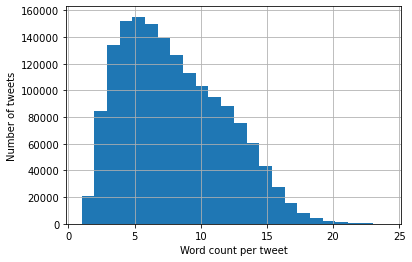

In [64]:
word_count = df['text'].str.split().str.len()
word_count.hist(bins=24)
plt.xlabel('Word count per tweet')
plt.ylabel('Number of tweets')
plt.show()

We choose 25 bins in the histogram because 25 is the maximum word count in our tweet data. It looks like most of the words are 4 to 5 words. Please remind that we have already removed the stopwords from the tweet. With the stop words these number would certainly be higher. 

In [56]:
word_count.describe()

count    1.599511e+06
mean     7.818063e+00
std      4.027496e+00
min      1.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      2.400000e+01
Name: text, dtype: float64

In [57]:
df[word_count == 0]

,sentiment,text


# Vizualize the top used words to get an idea of how many words to keep in the word vector. 

- Length of the word vector at max can be equal to the total number of words in english dictionary. 1000 might be the good vector to consider. But check it. 

- If the plan is to use in other text data the words appearing in tweet might not the be the good indicator of the most frequent words in other form of texts, eg. news, book etc. 


- top good words and top bad words in wordcloud 

In [66]:
word_count_stacked = df['text'].str.split(expand=True).stack().value_counts()
print('Total number of words in the dataset: \t', len(word_count))

Total number of words in the dataset: 	 1599511


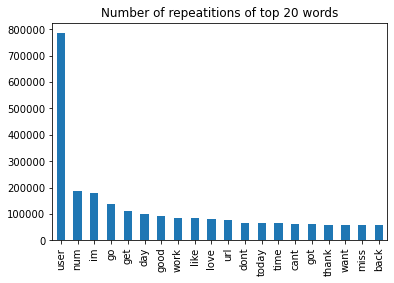

In [67]:
word_count_stacked.head(20).plot.bar()
plt.title('Number of repeatitions of top 20 words')
plt.show()

In [68]:
'go' in stop_words

False

So form the bar chart we see that the most repeated word (excluding stopwords) in the dataset is 'go'. 

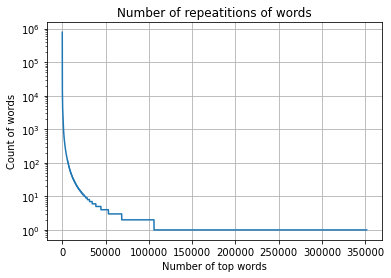

In [69]:
arr = word_count_stacked.values

plt.plot(arr)
plt.yscale('log')
plt.xlabel('Number of top words')
plt.ylabel('Count of words')
plt.title('Number of repeatitions of words')
plt.grid()

In [70]:
print('After top 110000, are the words repeated only once? \t ', \
      (arr[110000:] == 1).all())

After top 110000, are the words repeated only once? 	  True


From this plot it is seen that bottom 100000 words appreas just once in the dataset. It is safe to not to use those words in the data. But we can do better than this. We may need few top words as least repeated word is least likely to tell anything about the data. Lets look closer. 

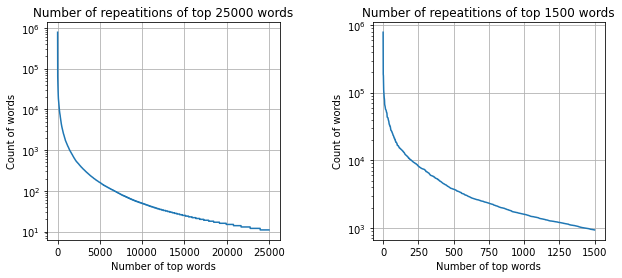

In [71]:
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(1, 2, 1)
plt.plot(arr[:25000])
plt.yscale('log')
plt.xlabel('Number of top words')
plt.ylabel('Count of words')
plt.title('Number of repeatitions of top 25000 words')
plt.grid()

ax = fig.add_subplot(1, 2, 2)
plt.plot(arr[:1500])
plt.yscale('log')
plt.xlabel('Number of top words')
plt.ylabel('Count of words')
plt.title('Number of repeatitions of top 1500 words')
plt.grid()

fig.subplots_adjust(wspace = 0.4)

If we choose top 25000 words then the least repeated word in the dataset apprears approximately 10 times. Top top 1500 words repeat at least 1000 times and top 500 words repeats at least 5000 times. There are 1600000 samples. So repeating a word 16000 times means that word appearing in 1% of the sample. Therefore, if we choose top 500 words the least repeated word appears in 0.3% of the sample and if we choose top 2000 words the least repeated word appears in 0.05% of the sample. To imphesize least repeated word of top 2000 word appear only once in each 2000 tweet. So top 1000 or 2000 sample must be enough.

# What are the top positive and negative words?

In [72]:
from wordcloud import WordCloud

In [73]:
text_positive = df[df['sentiment'] == 4]['text']
text_negative = df[df['sentiment'] == 0]['text']

word_count_positive = text_positive.str.split(expand=True).stack().value_counts()
word_count_negative = text_negative.str.split(expand=True).stack().value_counts()

In [74]:
cloud = WordCloud(max_words=100, 
                  width=200, 
                  height=200,
                  stopwords=stop_words,
                  colormap='magma',
                  background_color='white')

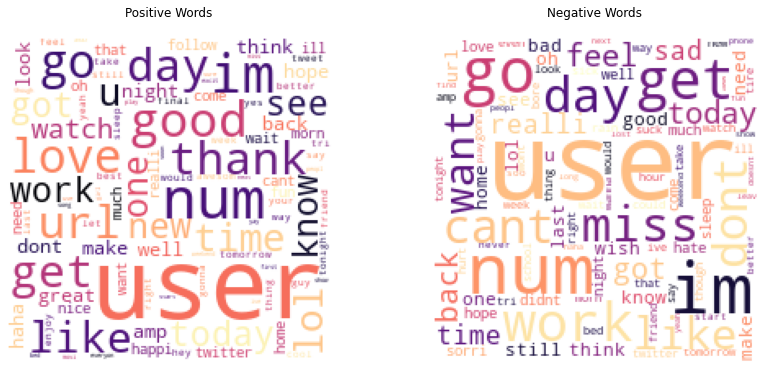

In [75]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
wc_positive = cloud.generate_from_frequencies(word_count_positive)
plt.imshow(wc_positive)
plt.axis('off')
plt.title('Positive Words \n')

ax = fig.add_subplot(1, 2, 2)
wc_negative = cloud.generate_from_frequencies(word_count_negative)
plt.imshow(wc_negative)
plt.axis('off')
plt.title('Negative Words \n')

plt.show()

#### What is 'Quot' and 'amp'?

It seems to be twitter text that is repeated in most of the tweet. 

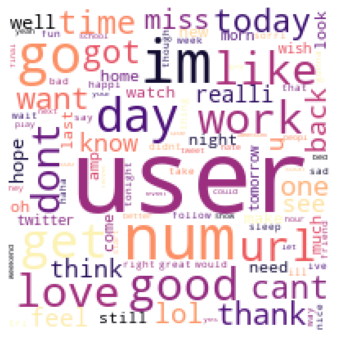

In [76]:
fig = plt.figure(figsize=(6, 6))
wc_total = cloud.generate_from_frequencies(word_count_stacked)
plt.imshow(wc_total)
plt.axis('off')
plt.show()

# Exporting CSV 

In [65]:
df.to_csv('Tweet_sentiment_clean.csv', index=False, encoding='ISO-8859-1')

In [29]:
df_long.to_csv('Tweet_sentiment_clean_long.csv', index=False, encoding='ISO-8859-1')

# Future directions 

- May be it is good idea to remove the words which are equally significant in good and bad sentiment data. Need to find a systematic and quantitative way to make a decision about it. 